In [28]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [40]:
data_file = "amazon_orders.csv"
df = pd.read_csv(data_file, low_memory=False)

In [42]:
print(f"Total orders: {len(df)}")
print(f"Orders by status:")
print(df['Status'].value_counts())

Total orders: 128975
Orders by status:
Status
Shipped                          77804
Shipped - Delivered to Buyer     28769
Cancelled                        18332
Shipped - Returned to Seller      1953
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64


In [52]:
count = 0
for index, row in df.iterrows():
    if count >= 5:
        break
    order_id = row['Order ID']
    date = row['Date']
    status = row['Status']
    sku = row['SKU']
    category = row['Category']
    amount = row['Amount'] if not pd.isna(row['Amount']) else 0
    currency = row['currency']

    print(f"\nOrder {index+1}:")
    print(f"  ID: {order_id}")
    print(f"  Date: {date}")
    print(f"  Status: {status}")
    print(f"  Product: {sku} ({category})")
    print(f"  Amount: {currency} {amount}")

    if status == "Shipped - Delivered to Buyer":
        print("  ✅ Order completed successfully")
    elif status == "Shipped":
        print("  🚚 Order in transit")
    elif status == "Cancelled":
        print("  ❌ Order was cancelled")

    count += 1


Order 1:
  ID: 405-8078784-5731545
  Date: 2022-04-30 00:00:00
  Status: Cancelled
  Product: SET389-KR-NP-S (Set)
  Amount: INR 647.62
  ❌ Order was cancelled

Order 2:
  ID: 171-9198151-1101146
  Date: 2022-04-30 00:00:00
  Status: Shipped - Delivered to Buyer
  Product: JNE3781-KR-XXXL (kurta)
  Amount: INR 406.0
  ✅ Order completed successfully

Order 3:
  ID: 404-0687676-7273146
  Date: 2022-04-30 00:00:00
  Status: Shipped
  Product: JNE3371-KR-XL (kurta)
  Amount: INR 329.0
  🚚 Order in transit

Order 4:
  ID: 403-9615377-8133951
  Date: 2022-04-30 00:00:00
  Status: Cancelled
  Product: J0341-DR-L (Western Dress)
  Amount: INR 753.33
  ❌ Order was cancelled

Order 5:
  ID: 407-1069790-7240320
  Date: 2022-04-30 00:00:00
  Status: Shipped
  Product: JNE3671-TU-XXXL (Top)
  Amount: INR 574.0
  🚚 Order in transit


In [62]:
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y')
orders_per_day = df.groupby(df['Date'].dt.date).size()
print(orders_per_day)

Date
2022-03-31     171
2022-04-01    1470
2022-04-02    1555
2022-04-03    1691
2022-04-04    1465
              ... 
2022-06-25    1026
2022-06-26    1210
2022-06-27    1111
2022-06-28    1210
2022-06-29     658
Length: 91, dtype: int64


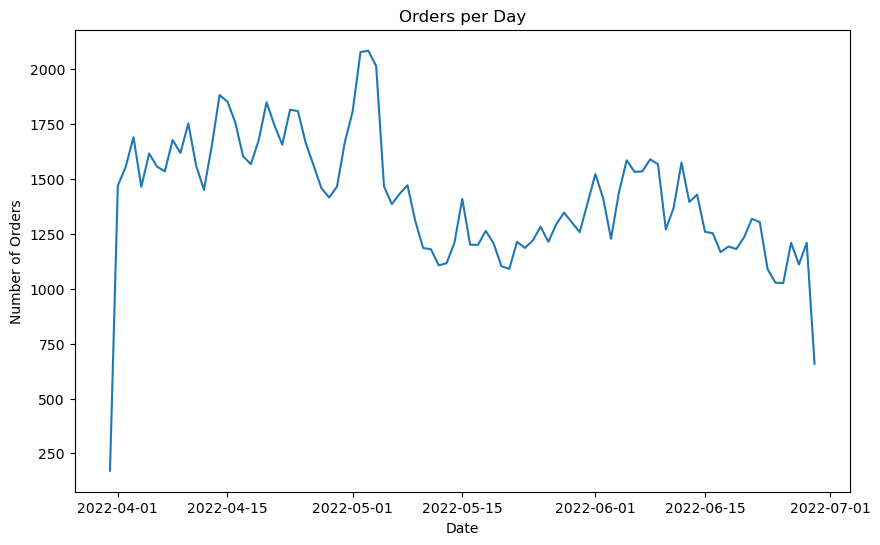

In [64]:
plt.figure(figsize=(10, 6))
plt.plot(orders_per_day.index, orders_per_day.values)
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.title('Orders per Day')
plt.show()

In [85]:
sku = df.groupby(df['SKU'])['Amount'].sum()
print(sku)

SKU
AN201-RED-M          458.0
AN201-RED-XL         602.0
AN201-RED-XXL        229.0
AN202-ORANGE-M       530.0
AN202-ORANGE-S      1141.0
                     ...  
SET449-KR-NP-S      1449.0
SET461-KR-NP-XL     1039.0
SET461-KR-NP-XS      769.0
SET461-KR-NP-XXL     769.0
SET462-KR-NP-S       999.0
Name: Amount, Length: 7195, dtype: float64
7195


In [83]:
print(len(df))

128975
